In [8]:
# import libraries
import pyarrow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import dataset
spotify_population = pd.read_feather('spotify_2000_2020.feather')


print(spotify_population.head(3))
print()
print(spotify_population.columns)

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   

   loudness  mode               name  popularity release_date  speechiness  \
0   -13.441   1.0  Shout to the Lord        47.0         2000       0.0290   
1    -9.841   0.0           Miss You        51.0   2000-12-12       0.0407   
2    -8.306   0.0          Real Eyes        44.0   2000-06-13       0.3420   

     tempo  valence    year  
0  136.

In [9]:
print(spotify_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

## Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

spotify_population is available and pandas is loaded as pd.

#### Instructions 

+ Sample 1000 rows from spotify_population, assigning to spotify_sample.
+ Calculate the mean duration in minutes from spotify_population using pandas.
+ Calculate the mean duration in minutes from spotify_sample using pandas.

In [11]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                                      artists  \
20122        0.5940                                ['Toby Love']   
7189         0.6940  ['Calle 13', 'Rubén Blades', 'La Chilinga']   
19961        0.3950                               ['The Weeknd']   
5968         0.1560               ['YoungBoy Never Broke Again']   
13413        0.3370               ['Bishop Paul S. Morton, Sr.']   
...             ...                                          ...   
29587        0.0027                          ['Head Automatica']   
34520        0.0261         ['JAY-Z', 'Kanye West', 'Mr Hudson']   
743          0.4000                             ['Led Zeppelin']   
41570        0.2440                                 ['Don Omar']   
7847         0.0368                                       ['MØ']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
20122         0.803     229973.0          3.832883   0.680       0.0   
7189          0.730     415637.0       

In [12]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8739580833333336


## Simple sampling and calculating with NumPy
You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

spotify_population is available and numpy is loaded as np.

#### Instructions 
+ Create a pandas Series, loudness_pop, by subsetting the loudness column from spotify_population.
+ Sample loudness_pop to get 100 random values, assigning to loudness_samp.
+ Calculate the mean of loudness_pop using numpy.
+ Calculate the mean of loudness_samp using numpy.

In [13]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = pd.Series(spotify_population['loudness'])

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Print the sample
print(loudness_samp)

19061    -3.665
18262    -5.359
40476   -10.744
12403    -4.925
27307    -9.312
          ...  
33540   -11.767
23529    -4.748
32380    -3.377
26447   -13.052
39266   -11.890
Name: loudness, Length: 100, dtype: float64


In [14]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.04384


## Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

spotify_population and spotify_mysterious_sample are available; pandas as pd, matplotlib.pyplot as plt, and numpy as np are loaded.

#### Instructions

+ Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().
+ Update the histogram code to use the spotify_mysterious_sample dataset.

In [15]:
# using an unknown spotify data with the same features as the previously import spotify data
mysterious_sample = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRap3kWpwEhSDTpqc_LrCbTQIY9qLhnpZP17axDfsGUSOV6DL_fJsqNp9vXbCAjfzrBds8c3NCJZg2f/pub?gid=709023650&single=true&output=csv')

# subset the spotify_population values based on the index of the mysterious data
spotify_mysterious_sample = spotify_population.loc[mysterious_sample['index'].to_numpy()]

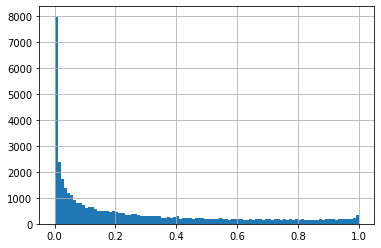

In [16]:
# Visualize the distribution of acousticness with a histogram
#plt.hist(spotify_population['acousticness'], bins=np.arange(0, 1+0.01, 0.01))
spotify_population['acousticness'].hist(bins=np.arange(0, 1 + 0.01, 0.01))
plt.show()

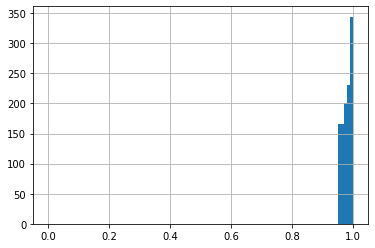

0.951 0.996


In [18]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()
print(spotify_mysterious_sample['acousticness'].min(), spotify_mysterious_sample['acousticness'].max())

#### Question
Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

#### Answer
+ No. The acousticness samples are consistently higher than those in the general population.

````
The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.
````

## Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

#### Instructions

+ Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15 using pandas .hist().
+ Update the histogram code to use the spotify_mysterious_sample2 dataset.

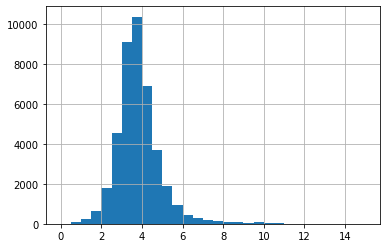

In [19]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15+0.5, 0.5))
plt.show()

In [ ]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

#### Question
Compare the two histograms you drew. Are the duration values in the sample generalizable to the general population?
#### Answer
+ Yes. The sample selected is likely a random sample of all songs in the population.

## Generating random numbers
You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

matplotlib.pyplot is loaded as plt, and numpy is loaded as np.

Instructions 1/4
+ Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.
+ Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.
+ Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3 using plt.hist().
+ Plot a histogram of normals with bins of width of 0.5 from -2 to 13 using plt.hist().

In [21]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3,high=3,size=5000)

# Print uniforms
print(uniforms)

[ 2.5669664  -0.33463899 -2.62706769 ...  0.52587276  2.78639416
  0.91612739]


In [22]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[4.98083667 7.61687566 4.97683024 ... 6.85626819 4.61180406 3.52990809]


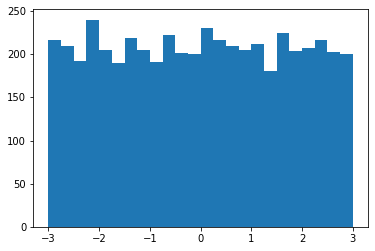

In [23]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

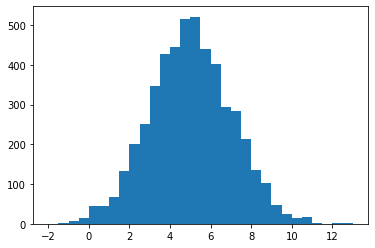

In [24]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

## Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

Instructions

#### Question
Which statement about x and y is true?

````
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
````
#### Answer
+ The values of x are different from those of y.

#### Question
Which statement about x and y is true?

````
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
````

#### Answer
+ x and y have identical values.

#### Question
Which statement about x and y is true?

````
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)`
````
#### Answer
+ The values of x are different from those of y.